# **Machine Learning View of RecommendationCount, IsFree, and FreeVerAvail in Relation to SteamSpyOwners.**

This notebook takes a closer look at the relationship between the number of recommendations a game has, whether a game is free, and whether a game has a free version with the number of owners of the game. We will be primairly using linear regression or some type of regression to see if we can predict the number of owners based on each of the variables listed above. 

**RecommendationCount** - Int, Based on how many people recommended the game

**IsFree** - Bool, True if game is free, False otherwise

**FreeVerAvail** - Bool, True if game has a free version, False otherwise

**SteamSpyOwners** - Int, Number of people who own the game

The data analysis of the above features is in the notebook from the following link: 
https://github.com/COGS108/group036_fa20/blob/master/Steam_Dataset_Analysis/Steam_DataSet_RecommendationCount_IsFree_FreeVerAvail_DataAnalysis.ipynb. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import patsy
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
from mpl_toolkits import mplot3d

import warnings
warnings.filterwarnings("ignore")

title_size = 20

# **Clean and Create Database**

We will be using the steam games dataset and keeping the columns, SteamSpyOwners, RecommendationCount, IsFree, and FreeVerAvail. Then we will also add extra columns, such as log transformations, for our machine learning analysis. 

In [4]:
# Link might need to be updated based on GitHub
df = pd.read_csv('https://raw.githubusercontent.com/COGS108/group036_fa20/master/Datasets/games-features.csv?token=AFASGDG236VMGHN44GU6Z4K72JSFU')

In [5]:
# Drop irrelevant columns
df = df[['SteamSpyOwners', 'RecommendationCount', 'IsFree', 'FreeVerAvail']]

# Add log transformation columns 
df['log_owners'] = np.log(df['SteamSpyOwners'])
df['log_rec'] = np.log(df['RecommendationCount'])

# Convert booleans to 1 = True and 0 = False
df['free_bool'] = df['IsFree'].apply(int)
df['free_ver_bool'] = df['FreeVerAvail'].apply(int)

# DataFrame with no games with 0 owners and 0 recommendations
df_drop0_all = df[(df['SteamSpyOwners'] > 0) & (df['RecommendationCount'] > 0)]

# DataFrame with no games with 0 owners
df_drop0_owners = df[df['SteamSpyOwners'] > 0]

# DataFrame with no games with 0 recommendations
df_drop0_rec = df[df['RecommendationCount'] > 0]

In [6]:
df.head()

,SteamSpyOwners,RecommendationCount,IsFree,FreeVerAvail,log_owners,log_rec,free_bool,free_ver_bool
0,13033334,68991,False,False,16.383021,11.141731,0,0
1,5399140,2439,False,False,15.501750,7.799343,0,0
2,7621102,2319,False,False,15.846432,7.748891,0,0
3,7498965,888,False,False,15.830276,6.788972,0,0
4,5399499,2934,False,False,15.501817,7.984122,0,0


# **Feature Distributions**

We'll look at the distributions of the columns we'll be conducting the linear regressions on, specifically log(Owner Count), log(Recommendation Count), IsFree, and FreeVerAvail. 

We chose these variables based on their distributions together as seen in the data analysis in another notebook (linked at the top of this notebook). 

After looking at the distributions, none of individual features seem valid for linear regression. However, when we plot the feaetures against each other, there does seem to be some relationship. 

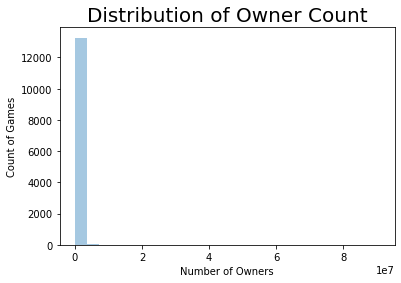

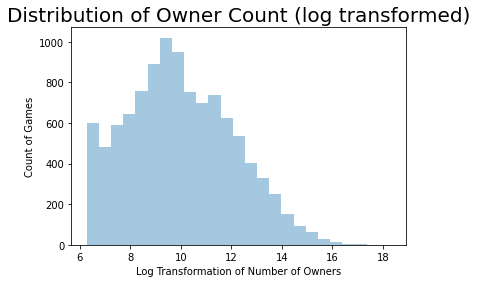

In [7]:
# Owner Count and log(Owner Count) Distribution

# Raw counts of the number of owners after dropping 0's
sns.distplot(df['SteamSpyOwners'], bins = 25, kde = False)
plt.title('Distribution of Owner Count', fontsize = title_size)
plt.xlabel('Number of Owners')
plt.ylabel('Count of Games')
plt.show()

# Log transformation of number of owners (dropping all 0's)
# Can't use those with 0's b/c log(0) = -inf, and can't be plotted
sns.distplot(df_drop0_owners['log_owners'], bins = 25, kde = False)
plt.title('Distribution of Owner Count (log transformed)', fontsize = title_size)
plt.xlabel('Log Transformation of Number of Owners')
plt.ylabel('Count of Games')
plt.show()

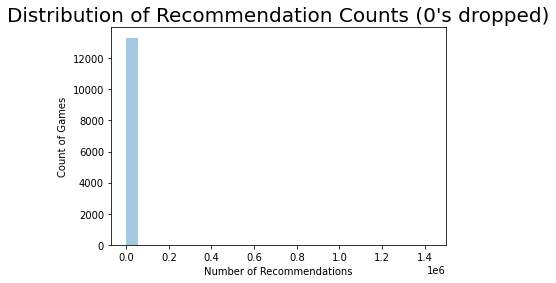

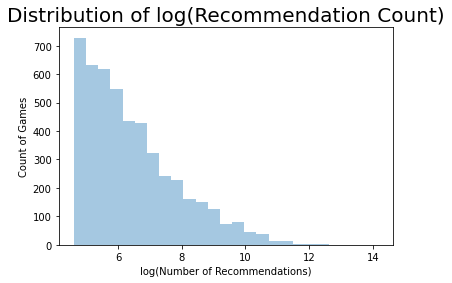

In [8]:
# Recommendation Count and log(Recommendation Count) Distribution

# Distribution of Recommendation Count 
sns.distplot(df['RecommendationCount'], bins = 25, kde = False)
plt.title('Distribution of Recommendation Counts (0\'s dropped)', fontsize = title_size)
plt.xlabel('Number of Recommendations')
plt.ylabel('Count of Games')
plt.show()

# Distribution of log(Recommendation Count)
sns.distplot(df_drop0_rec['log_rec'], bins = 25, kde = False)
plt.title('Distribution of log(Recommendation Count)', fontsize = title_size)
plt.xlabel('log(Number of Recommendations)')
plt.ylabel('Count of Games')
plt.show()

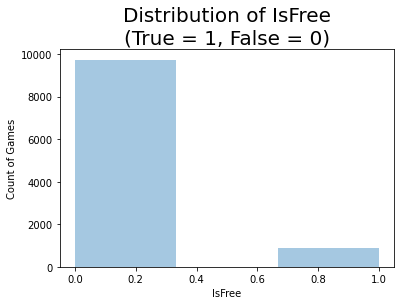

In [9]:
# Distribution of IsFree
sns.distplot(df_drop0_owners['free_bool'], bins = 3, kde = False)
plt.title('Distribution of IsFree\n(True = 1, False = 0)', fontsize = title_size)
plt.xlabel('IsFree')
plt.ylabel('Count of Games')
plt.show()

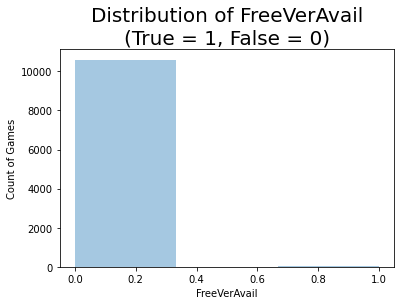

In [10]:
# Distribution of FreeVerAvail
sns.distplot(df_drop0_owners['free_ver_bool'], bins = 3, kde = False)
plt.title('Distribution of FreeVerAvail\n(True = 1, False = 0)', fontsize = title_size)
plt.xlabel('FreeVerAvail')
plt.ylabel('Count of Games')
plt.show()

# **RecommendationCount vs. Owners**

This is the linear regression test between the log of recommendation count and log of owners. 

Although the distributions of the features don't follow the prerequisites of linear regression, there does seem to be some linear relationship between the log of recommendation count and owners. 

However, despite a clear positive relationship and a low RMSE, the residual plot does seem to show some sort of linear flat pattern. Since our residual plot doesn't seem to be random, there might be an underlying confounding variable that might explain the relationship between RecommendationCount and SteamSpyOwners. So we cannot use a linear regression with RecommendationCount only to predcit the number of owners of a game. 

In [11]:
outcome, predictors = patsy.dmatrices('log_owners ~ log_rec', df_drop0_all)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             log_owners   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     8264.
Date:                Thu, 03 Dec 2020   Prob (F-statistic):               0.00
Time:                        18:27:25   Log-Likelihood:                -6769.7
No. Observations:                4840   AIC:                         1.354e+04
Df Residuals:                    4838   BIC:                         1.356e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8465      0.064     90.895      0.0

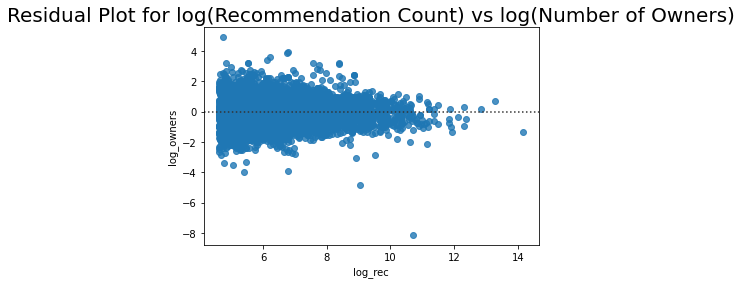

In [12]:
# Residual Plot of log(Recommendation Count) and log(Number of Owners)
sns.residplot(data=df_drop0_all, x='log_rec', y='log_owners')
plt.title('Residual Plot for log(Recommendation Count) vs log(Number of Owners)', fontsize = title_size)
plt.show()

After plotting the residual plot, we can see that there is some sort of traingle pattern forming and that the plot is completely random. This means would mean that there is some sort of cone shaped distribution in our linear regression, and that it's not best that we use linear regression. 

However, we'll still perform linear regression to see what we get as a result. 

R^2 score:  0.6342392473399898


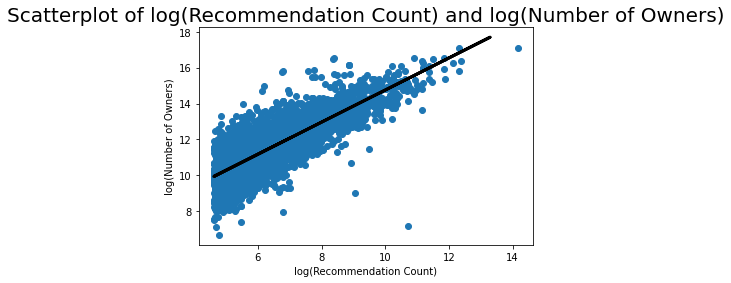

In [13]:
x_train, x_test, y_train, y_test = train_test_split(np.array(df_drop0_all['log_rec']), 
                                                    np.array(df_drop0_all['log_owners']), test_size = 0.3)
reg = LinearRegression()
#Fit
reg.fit(np.reshape(x_train, (-1,1)), np.reshape(y_train, (-1, 1)))
predicted = reg.predict(np.reshape(x_test, (-1,1)))
#R^2
print('R^2 score: ', reg.score(np.reshape(x_train, (-1,1)), np.reshape(y_train, (-1, 1))))
#Plot regression line and scatter
import matplotlib.pyplot as plt
plt.plot(x_test, predicted, color = 'black', linewidth = 3)
plt.scatter(x = x_train, y= y_train)
plt.title('Scatterplot of log(Recommendation Count) and log(Number of Owners)', fontsize = title_size)
plt.xlabel('log(Recommendation Count)')
plt.ylabel('log(Number of Owners)')
plt.show()

The graph shows a positive relationship between the log(recommendation count) and the log(number of owners) and has a high r squared score of 0.634, meaning 0.634 of the variance is explained by the regression line. 

In [14]:
print('Intercept: \n', reg.intercept_)
print('Coefficients: \n', reg.coef_)

Intercept: 
 [5.81799593]
Coefficients: 
 [[0.89336737]]


If a linear regression was taken between the log of recommendation count and the log of number of owners, then the resulting linear regression equation would be: 

*log(SteamSpyOwners) = 5.841 + 0.8879 * log(RecommendationCount)*

In [15]:
# RMSE Error
print('RMSE:', np.sqrt(np.mean(y_test - predicted)**2))

RMSE: 0.02406341671459059


The RMSE, or the root mean squared error is fairly low, at 0.0144. 

# **IsFree vs. Owners**

This is the linear regression test between the IsFree and log of owners. 

In order to perform linear regression, we converted the booleans to their respective integer value, 1 and 0, and performed a linear regression. However, there doesn't seem to be any clear relationship from the linear regression since there's only two values of IsFree. 

In [16]:
outcome, predictors = patsy.dmatrices('log_owners ~ IsFree', df_drop0_owners)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             log_owners   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     862.7
Date:                Thu, 03 Dec 2020   Prob (F-statistic):          2.18e-182
Time:                        18:27:26   Log-Likelihood:                -22549.
No. Observations:               10619   AIC:                         4.510e+04
Df Residuals:                   10617   BIC:                         4.512e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          9.8083      0.021    478.

R^2 score:  0.07477214775234553


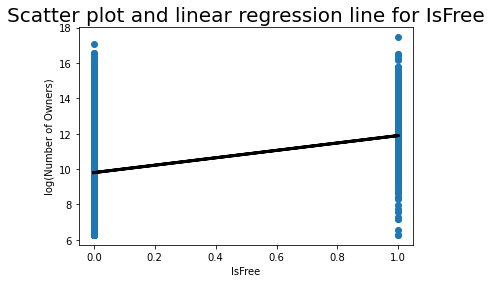

In [17]:
x_train, x_test, y_train, y_test = train_test_split(np.array(df_drop0_owners['IsFree']), 
                                                    np.array(df_drop0_owners['log_owners']), test_size = 0.3)
reg = LinearRegression()
#Fit
reg.fit(np.reshape(x_train, (-1,1)), np.reshape(y_train, (-1, 1)))
predicted = reg.predict(np.reshape(x_test, (-1,1)))
#R^2
print('R^2 score: ', reg.score(np.reshape(x_train, (-1,1)), np.reshape(y_train, (-1, 1))))
#Plot regression line and scatter
import matplotlib.pyplot as plt
plt.plot(x_test, predicted, color = 'black', linewidth = 3)
plt.scatter(x = x_train, y= y_train)
plt.title('Scatter plot and linear regression line for IsFree', fontsize = title_size)
plt.xlabel('IsFree')
plt.ylabel('log(Number of Owners)')
plt.show()

In [18]:
print('Intercept: \n', reg.intercept_)
print('Coefficients: \n', reg.coef_)

Intercept: 
 [9.80032802]
Coefficients: 
 [[2.09262505]]


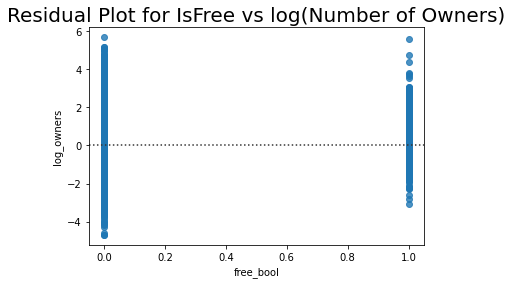

In [19]:
# Residual Plot of IsFree and log(Number of Owners)
sns.residplot(data=df_drop0_all, x='free_bool', y='log_owners')
plt.title('Residual Plot for IsFree vs log(Number of Owners)', fontsize = title_size)
plt.show()

Our residual plot shows a very clear pattern of two vertical lines, and thus this isn't fit for linear regression. 

# **FreeVerAvail vs. Owners**

This is the linear regression test between the FreeVerAvail and log of owners. 

In order to perform linear regression, we converted the booleans to their respective integer value, 1 and 0, and performed a linear regression. However, there doesn't seem to be any clear relationship from the linear regression since there's only two values of FreeVerAvail. 

In [20]:
outcome, predictors = patsy.dmatrices('log_owners ~ FreeVerAvail', df_drop0_owners)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             log_owners   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     29.17
Date:                Thu, 03 Dec 2020   Prob (F-statistic):           6.79e-08
Time:                        18:27:27   Log-Likelihood:                -22949.
No. Observations:               10619   AIC:                         4.590e+04
Df Residuals:                   10617   BIC:                         4.592e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                9.9772 

R^2 score:  0.0027139889568928988


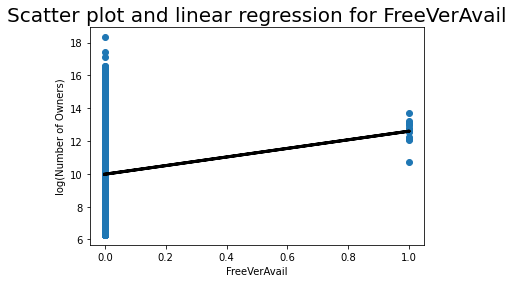

In [21]:
x_train, x_test, y_train, y_test = train_test_split(np.array(df_drop0_owners['FreeVerAvail']), 
                                                    np.array(df_drop0_owners['log_owners']), test_size = 0.3)
reg = LinearRegression()
#Fit
reg.fit(np.reshape(x_train, (-1,1)), np.reshape(y_train, (-1, 1)))
predicted = reg.predict(np.reshape(x_test, (-1,1)))
#R^2
print('R^2 score: ', reg.score(np.reshape(x_train, (-1,1)), np.reshape(y_train, (-1, 1))))
#Plot regression line and scatter
import matplotlib.pyplot as plt
plt.plot(x_test, predicted, color = 'black', linewidth = 3)
plt.scatter(x = x_train, y= y_train)
plt.title('Scatter plot and linear regression for FreeVerAvail', fontsize = title_size)
plt.xlabel('FreeVerAvail')
plt.ylabel('log(Number of Owners)')
plt.show()

In [22]:
print('Intercept: \n', reg.intercept_)
print('Coefficients: \n', reg.coef_)

Intercept: 
 [9.97653199]
Coefficients: 
 [[2.62371102]]


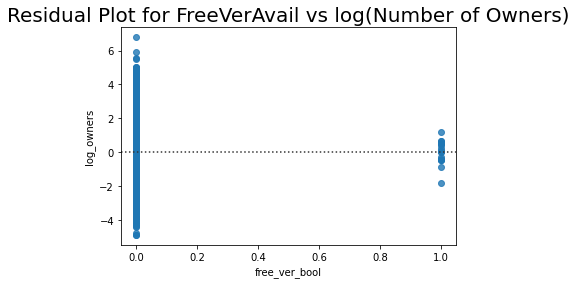

In [23]:
# Residual Plot of FreeVerAvail and log(Number of Owners)
sns.residplot(data=df_drop0_all, x='free_ver_bool', y='log_owners')
plt.title('Residual Plot for FreeVerAvail vs log(Number of Owners)', fontsize = title_size)
plt.show()

The residual plot shows another clear two vertical line pattern, and thus this isn't fit for linear regression either. 

# **Conclusion**

After plotting out our scatterplots and fitting a linear regression on the three features, it looks like the log(Recommendation Count) and log(SteamSpyOwners) has the strongest positive relationship. However, there does seem to be a traingle/cone like pattern in its residual and actual scatterplot, so linear regression might not be the best predictor model to use. 

For the other features, we can clearly see from the scatter plots themselves, that they aren't fit for linear regression, and there are clear patterns in the residual plots suggesting a non-linear pattern. So we will continue to look into these features under classification in the classification notebooks.